<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Neuromatch-Academy-Project---Steinmetz-Dataset---Mouse-Mind-Reading" data-toc-modified-id="Neuromatch-Academy-Project---Steinmetz-Dataset---Mouse-Mind-Reading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Neuromatch Academy Project - Steinmetz Dataset - Mouse Mind Reading</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#explore-dictionary-for-session" data-toc-modified-id="explore-dictionary-for-session-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>explore dictionary for session</a></span></li></ul></li></ul></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#via-oneibl-by-client" data-toc-modified-id="via-oneibl-by-client-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>via oneibl by client</a></span></li><li><span><a href="#via-google-drive-directly" data-toc-modified-id="via-google-drive-directly-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>via google drive directly</a></span></li><li><span><a href="#cleanup-channel-infos" data-toc-modified-id="cleanup-channel-infos-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>cleanup channel infos</a></span></li><li><span><a href="#cleaning-up-spikes" data-toc-modified-id="cleaning-up-spikes-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>cleaning up spikes</a></span></li><li><span><a href="#cleanup-trial-info" data-toc-modified-id="cleanup-trial-info-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>cleanup trial info</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt

from nma_class import NMA_project
#from nma_class_Copy_to_load_diff_sessions import NMA_project

%matplotlib inline

In [2]:
# only if you are on jupyter notebook not if on colab
#import qgrid 

# Neuromatch Academy Project - Steinmetz Dataset - Mouse Mind Reading

In [3]:
# link to parent folder with all datasets
#main_folder = "/content/gdrive/My Drive/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
#main_folder = "C:/Users/User/Google Drive/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
#main_folder = "Z:/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
main_folder = '/Volumes/GoogleDrive/My Drive/NMA_Dataset/Dataset_1'

# create session object
nma_obj = NMA_project(main_folder) 

# default session is initialized, extract interesting dataframes in dedicated variables
session = nma_obj.std_session
channels_df = session['channels_df']
spikes_df = session['spikes_df']
clusters_df = session['clusters_df']
trials_df = session['trials_df']



#### explore dictionary for session
- each ession is a dictionary
- each element kontains eather a numpy array or a dataframe
- the most important dataframes we are going to work with are:
    - clusters_df: all the spikes and clusters
    - trials_df: all the behaviour data for all trials

In [4]:
#how to pick a new variable from dataset "session"
some_var = session['spontaneous_intervals']
#print(len(some_var))
#some_var

In [5]:
for key in nma_obj.std_session.keys():
    print(key)

face_timestamps
trials_feedback_times
passiveVisual_times
clusters_templateWaveformChans
passiveVisual_contrastLeft
passiveVisual_contrastRight
passiveBeeps_times
trials_included
wheelMoves_intervals
channels_rawRow
clusters_peakChannel
channels_brainLocation
licks_times
Cori_2016-12-14_M2_g0_t0_imec_lf_timestamps
spikes_amps
trials_visualStim_times
probes_sitePositions
clusters_waveformDuration
passiveWhiteNoise_times
passiveValveClick_times
channels_sitePositions
eye_area
trials_visualStim_contrastRight
clusters_originalIDs
lickPiezo_timestamps
clusters_probes
wheel_timestamps
trials_intervals
clusters_depths
spikes_depths
trials_response_times
sparseNoise_positions
Cori_2016-12-14_V1_g0_t0_imec_lf_timestamps
probes_description
spikes_times
channels_site
eye_timestamps
spontaneous_intervals
eye_xyPos
trials_visualStim_contrastLeft
clusters__phy_annotation
clusters_templateWaveforms
lickPiezo_raw
probes_rawFilename
face_motionEnergy
channels_probe
trials_repNum
wheel_position
sparseNo

# DFs: 
1. channels_dF

2. clusters_df

3. spikes_df
    * (wheel mov vars)


4. wheel_df
    * plots about wheel mov


5. trials_df 
    * all correct
    * only diff contrast
    * contrast=0 
    * print % 
    * plotting 
    



In [6]:
channels_df

,ccf_ap,ccf_dv,ccf_lr,allen_ontology,channel 0,channel 1,probe,raw row,channels_site
0,4432.3,4699.7,5002.3,LS,43.0,20.0,0.0,0,0
1,4428.4,4699.7,4970.6,LS,11.0,20.0,0.0,1,1
2,4431.3,4680.0,5018.6,LS,59.0,40.0,0.0,2,2
3,4427.3,4680.0,4986.8,LS,27.0,40.0,0.0,3,3
4,4426.3,4660.2,5003.1,LS,43.0,60.0,0.0,4,4
...,...,...,...,...,...,...,...,...,...
743,9587.1,1073.8,2484.3,VISp,59.0,3800.0,1.0,378,378
744,9601.2,1054.6,2493.6,root,43.0,3820.0,1.0,380,380
745,9620.7,1054.6,2519.0,root,11.0,3820.0,1.0,381,381
746,9595.8,1035.4,2477.6,root,59.0,3840.0,1.0,382,382


In [7]:
clusters_df

,lable,spikes,total spikes,recording area
cluster,,,,
0,bad,"[0.8149, 14.822466666666667, 24.9646, 25.1436,...",826,ACA
1,bad,"[0.0281, 0.7068666666666666, 1.3172, 1.4209666...",2818,MOs
2,bad,"[77.22096666666667, 87.62533333333333, 87.7326...",3953,ACA
3,bad,"[16.713966666666668, 22.983266666666665, 89.84...",646,LS
4,mua,"[0.8383666666666667, 1.4296666666666666, 5.238...",5124,LS
...,...,...,...,...
1080,bad,"[2.4490178426851834, 2.4553178708623205, 2.463...",82180,SUB
1081,bad,"[4.736494740187061, 7.13337212698716, 7.138605...",3546,DG
1082,bad,"[10.78215511298693, 12.231561595517482, 13.026...",1624,DG


In [8]:
spikes_df

,cluster,spike_times
0,21,0.002767
1,254,0.006700
2,480,0.009400
3,107,0.010467
4,238,0.011467
...,...,...
8232860,533,3471.897333
8232861,391,3471.898333
8232862,516,3471.900033
8232863,526,3471.902033


In [89]:
# add wheelmovement
print(session['wheel_position'].shape)
print(session['wheel_timestamps'].shape)
print(session['wheelMoves_intervals'].shape)
print(session['wheelMoves_type'].shape)

'''
0 for 'flinches' or otherwise unclassified movements, 
1 for left/clockwise turns, 
2 for right/counter-clockwise turns 
(where again "left" means "would be the correct direction for a stimulus presented on the left). 
A detected movement is counted as 'left' or 'right' only if it was sufficient amplitude that it would have registered 
a correct response (and possibly did), within a minimum amount of time from the start of the movement. 
Movements failing those criteria are flinch/unclassified type.
'''

(6570000, 1)
(2, 2)
(507, 2)
(507, 1)


'\n0 for \'flinches\' or otherwise unclassified movements, \n1 for left/clockwise turns, \n2 for right/counter-clockwise turns \n(where again "left" means "would be the correct direction for a stimulus presented on the left). \nA detected movement is counted as \'left\' or \'right\' only if it was sufficient amplitude that it would have registered \na correct response (and possibly did), within a minimum amount of time from the start of the movement. \nMovements failing those criteria are flinch/unclassified type.\n'

In [90]:
wheel_df = pd.merge( pd.DataFrame(session['wheelMoves_intervals']), pd.DataFrame(session['wheelMoves_type']), how='left', left_index=True, right_index=True)

In [91]:
wheel_df

,0_x,1,0_y
0,47.702504,47.920504,0.0
1,56.052504,56.764504,1.0
2,56.967504,58.936504,0.0
3,61.059504,61.838504,1.0
4,63.052504,64.273504,0.0
...,...,...,...
502,2598.472504,2598.537504,0.0
503,2628.502504,2628.791504,0.0
504,2637.446504,2638.746504,0.0
505,2642.070504,2642.353504,0.0


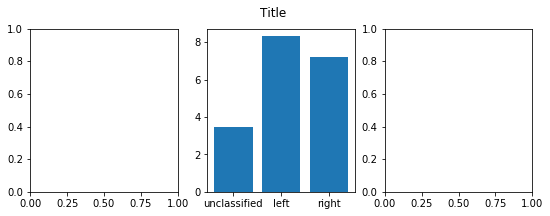

In [93]:
## Duration of the wheel movement - wheel_mov_dur

#duration of the wheel movement
wheel_mov_dur = wheel_df[1]-wheel_df['0_x'] 
wheel_mov_dur
wheelMoves_type1 = session['wheelMoves_type']


#create empty array of given length; bar plot
##create var wheel_Moves_type2 where 0 is L and 1 is R
wheelMoves_type2 = [0] * (len(wheelMoves_type1))
for i in range(len(wheelMoves_type1)):
    if wheelMoves_type1[i] == 0: 
        wheelMoves_type2[i] = 'unclassified'
        #print('0')
    elif wheelMoves_type1[i] == 1:
        wheelMoves_type2[i] = 'left'
        #print('1')
    else:
        wheelMoves_type2[i] = 'right'
        #print('2')    

        
colors = {'unclassified':'red', 'left':'blue', 'right':'green'}

#plot the figure 
plt.figure(figsize=(9, 3))

plt.subplot(131)
#plt.plot(wheel_mov_time2)

plt.subplot(132)
plt.bar(wheelMoves_type2,wheel_mov_dur)

plt.subplot(133)

#plt.plot(wheel_mov_time2)

plt.suptitle('Title')
plt.show()


#for i in range(len(test1)):
#    if test1[i] == 0: 
#        print('0')
#    else: 
#        print('1')

In [94]:
 trials_df.head()

,included,active,repetition number,go cue,stim time,response time,feedback time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement
0,True,1.0,1.0,62.900284,65.269408,66.419612,66.456227,1.0,0.0,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,..."
1,True,1.0,1.0,68.420838,71.202703,72.602206,72.640326,0.0,0.5,-1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,True,1.0,1.0,74.602902,76.052380,77.001671,77.038396,1.0,0.5,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,True,1.0,1.0,79.003653,81.235263,83.502065,83.531699,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,True,1.0,1.0,85.501795,86.800952,87.617727,87.628565,0.5,1.0,1.0,-1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [95]:
len(trials_df['wheel movement'][1])

2500

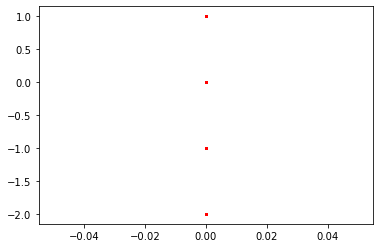

In [45]:

for i in range(len(trials_df['wheel movement'][1])): 

    plt.plot(trials_df['wheel movement'][1][i], 'ro',markersize=1)

In [47]:
# 1. All correct 
# create new variable with true where all the trials are correct = 1
#all_correct = (trials_df['feedback type']==1)
#print(all_correct.head())

# https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

# Create data frame only with the correct
correct_df = trials_df.loc[(trials_df['feedback type']==1)]
correct_df.head()


,included,active,repetition number,go cue,stim time,response time,feedback time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement
0,True,1.0,1.0,62.900284,65.269408,66.419612,66.456227,1.0,0.0,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,..."
1,True,1.0,1.0,68.420838,71.202703,72.602206,72.640326,0.0,0.5,-1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,True,1.0,1.0,74.602902,76.052380,77.001671,77.038396,1.0,0.5,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,True,1.0,1.0,79.003653,81.235263,83.502065,83.531699,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,True,1.0,4.0,102.902255,105.566451,107.663576,107.704085,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [48]:
# 2. Create one df only for dif contrast trials and another for 0 and 0 

#diff contract trials
diff_contrasts_df = correct_df.loc[(correct_df['stim contrast left']!=(correct_df['stim contrast right']))]
diff_contrasts_df.head()

,included,active,repetition number,go cue,stim time,response time,feedback time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement
0,True,1.0,1.0,62.900284,65.269408,66.419612,66.456227,1.0,0.0,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,..."
1,True,1.0,1.0,68.420838,71.202703,72.602206,72.640326,0.0,0.5,-1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,True,1.0,1.0,74.602902,76.052380,77.001671,77.038396,1.0,0.5,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,True,1.0,1.0,109.661966,111.066939,112.316606,112.353759,1.0,0.5,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10,True,1.0,1.0,114.318209,115.982617,116.832742,116.868631,0.5,0.0,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [49]:
# 2. Create one df only for dif contrast trials and another for 0 and 0 

#same contrast 0
#diff contract trials
no_contrasts_df = correct_df.loc[(correct_df['stim contrast left']==0) & (correct_df['stim contrast right']==0)]
no_contrasts_df.head()

,included,active,repetition number,go cue,stim time,response time,feedback time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement
3,True,1.0,1.0,79.003653,81.235263,83.502065,83.531699,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,True,1.0,4.0,102.902255,105.566451,107.663576,107.704085,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
11,True,1.0,1.0,118.833840,123.716340,126.403458,126.433983,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
16,True,1.0,1.0,145.730701,152.697202,154.949572,154.979639,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
20,True,1.0,3.0,174.913822,175.479965,178.034969,178.065607,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [84]:
all_t = len(trials_df)
crrct = len(correct_df)
cont = len(diff_contrasts_df)
nocont = len(no_contrasts_df)

df1 = ''
df1 = {'session name': " CHANGE "
      'all trials':[all_t], 
      'correct trials':[crrct], 
      'diff contrast t':[cont], 
      'no contras':[nocont], 
      '%Correct':[round(crrct/all_t*100,2)], '%Contrast':[round(cont/crrct*100,2)], '% 0contrast':[round(nocont/crrct*100,2)]}

df2 = pd.DataFrame(data=df1)


print('Correct trials: ', crrct,'/',all_t, '->', round(crrct/all_t*100,2), '%')
print('Dif contrast trials: ', cont,'/',crrct, '->', round(cont/crrct*100,2), '%')
print('0 Contrast trials: ', nocont,'/',crrct, '->', round(nocont/crrct*100,2), '%')
df2

Correct trials:  141 / 214 -> 65.89 %
Dif contrast trials:  103 / 141 -> 73.05 %
0 Contrast trials:  34 / 141 -> 24.11 %


,all trials,correct trials,diff contrast t,no contras,%Correct,%Contrast,% 0contrast,Session_name
0,214,141,103,34,65.89,73.05,24.11,1 -


In [ ]:
#add the different values per session 
# to initialize
df3 = ''

In [ ]:
#to keep adding
df3.append(df2) 

df3 

In [25]:
#add new column to existing df

# creating a new column TRIAL_NUMBER, from the index
trials_df['trial_number'] = trials_df.index+1
trials_df.head()

,included,active,repetition number,go cue,stim time,response time,feedback time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement,trial_number,go cueA,stim timeA,response timeA,feedback timeA
0,True,1.0,1.0,46.950166,47.626598,48.731152,48.775736,0.25,0.0,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0.676431,1.78099,1.82557
1,True,1.0,1.0,50.720940,55.110670,57.700059,57.732249,0.00,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0,4.38973,6.97912,7.01131
2,True,1.0,1.0,59.697526,69.356485,70.196773,70.234006,1.00,0.0,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,0,9.65896,10.4992,10.5365
3,True,1.0,1.0,72.201935,72.750968,73.512990,73.548848,0.00,0.5,-1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,0,0.549033,1.31106,1.34691
4,True,1.0,1.0,75.516003,76.941090,77.662268,77.662268,0.00,0.0,-1.0,-1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,0,1.42509,2.14626,2.14626


In [26]:
trials_df.head()

,included,active,repetition number,go cue,stim time,response time,feedback time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement,trial_number,go cueA,stim timeA,response timeA,feedback timeA
0,True,1.0,1.0,46.950166,47.626598,48.731152,48.775736,0.25,0.0,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0.676431,1.78099,1.82557
1,True,1.0,1.0,50.720940,55.110670,57.700059,57.732249,0.00,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0,4.38973,6.97912,7.01131
2,True,1.0,1.0,59.697526,69.356485,70.196773,70.234006,1.00,0.0,1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,0,9.65896,10.4992,10.5365
3,True,1.0,1.0,72.201935,72.750968,73.512990,73.548848,0.00,0.5,-1.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,0,0.549033,1.31106,1.34691
4,True,1.0,1.0,75.516003,76.941090,77.662268,77.662268,0.00,0.0,-1.0,-1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,0,1.42509,2.14626,2.14626


In [27]:
df_aligned = trials_df
df_aligned['go cueA'] = ""
df_aligned['stim timeA'] = ""
df_aligned['response timeA'] = ""
df_aligned['feedback timeA'] = ""

for i in range(0,len(df_aligned)):
    df_aligned['go cueA'][i] = df_aligned['go cue'][i]-trials_df['go cue'][i]
    #print(df_aligned['go cueA'][i])
    df_aligned['stim timeA'][i] = df_aligned['stim time'][i]-trials_df['go cue'][i]
    #print(df_aligned['stim timeA'][i])
    df_aligned['response timeA'][i] = df_aligned['response time'][i]-trials_df['go cue'][i]
    df_aligned['feedback timeA'][i] = df_aligned['feedback time'][i]-trials_df['go cue'][i]
    
    
    
    
    
    
    
#to test 
#df = pd.DataFrame(data) 
#df['C'] = ""
#for i in range(0,len(A)): 
#    df['C'][i] = B[i]-A[i]
#df

0.0
0.6764313506414865
0.0
4.389730196056355
0.0
9.658959193356338
0.0
0.5490332009087098
0.0
1.425086752940075
0.0
1.7816140500787156
0.0
0.46183274477157
0.0
0.4336724434394341
0.0
4.70526708749118
0.0
0.5505165930383953
0.0
0.349663363352704
0.0
0.6623210128913826
0.0
0.6946136208954385
0.0
0.3802208190662242
0.0
0.5963121751322689
0.0
0.39559569277597006
0.0
0.5620897083232705
0.0
1.3946467248082115
0.0
0.6355242611242602
0.0
0.9290822556536966
0.0
3.175898832035273
0.0
1.3882223145558896
0.0
1.6218188451557012
0.0
0.47350547733478265
0.0
0.9655639220522403
0.0
0.6180918374810176
0.0
1.3779913160290391
0.0
2.676738277614163
0.0
0.9842968043602411
0.0
0.4592765044824034
0.0
0.3777270660043257
0.0
2.6572978105781715
0.0
2.0631835553870133
0.0
0.4979751085878945
0.0
0.6758725881579721
0.0
0.6836711133295807
0.0
0.7151616511589509
0.0
3.563207572947306
0.0
0.5799378078847894
0.0
1.3257187982532912
0.0
0.6255395890028694
0.0
0.4397252509662337
0.0
1.0997746876037695
0.0
2.14525281498751

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/lib/p

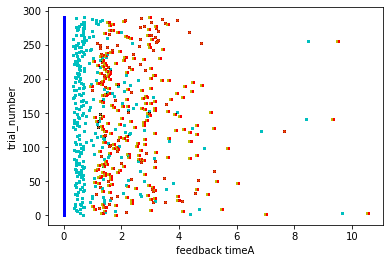

<Figure size 3600x3600 with 0 Axes>

In [29]:
#scatter plot divided by colors according to 
df = df_aligned


ax = plt.gca()
    
for i in range (1,len(df)):
    #df.plot.scatter(x='go cue', y='trial_number', s=0.2, c=np.where((df['response choice']==1), 'r', 'g'), marker='.', grid=False, ax=ax)
    df.plot.scatter(x='go cueA', y='trial_number', s=0.2, c='b', grid=False, ax=ax)
    df.plot.scatter(x='stim timeA', y='trial_number', s=0.2, c='c',grid=False, ax=ax)
    df.plot.scatter(x='response timeA', y='trial_number', s=0.2, c='y', grid=False, ax=ax)
    df.plot.scatter(x='feedback timeA', y='trial_number', s=0.2, c='r', grid=False, ax=ax)

#plt.savefig(...)
fig=plt.figure(figsize=(50, 50))
plt.show()

In [21]:

#how to pick a new variable from dataset "session"
eye_area = session['eye_area']
eye_area
len(eye_area)

267759

In [22]:
wheel_position = session['wheel_position']
wheel_position

array([[    0.],
       [    0.],
       [    0.],
       ...,
       [17242.],
       [17242.],
       [17242.]])

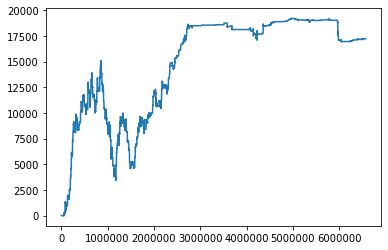

In [24]:
plt.plot(wheel_position)

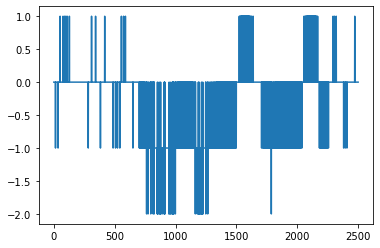

In [61]:
#plt.plot(trials_df['stim contrast left'])
#plt.plot(trials_df['stim contrast right'])
#plt.plot(trials_df['response choice'])

test = np.cumsum(trials_df['wheel movement'])
plt.plot(trials_df['wheel movement'][1])



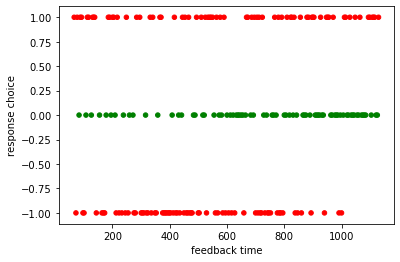

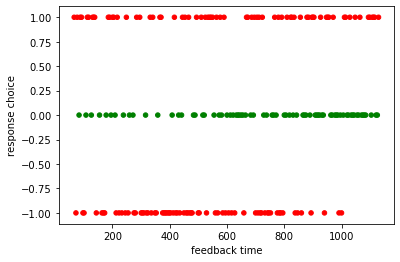

In [240]:
#scatter plot divided by colors according to 
df = trials_df
df.plot.scatter(x='feedback time', y='response choice', s=20, c=np.where(df['response choice'], 'r', 'g'), grid=False)
df.plot.scatter(x='feedback time', y='response choice', s=20, c=np.where(df['response choice'], 'r', 'g'), grid=False)
plt.show()

0      2.369125
1      2.781865
2      1.449478
3      2.231610
4      1.299156
         ...   
209    0.581641
210    0.715252
211    0.431463
212    0.344811
213    0.688081
Length: 214, dtype: float64
0.32721510941570386
8.298038045912165


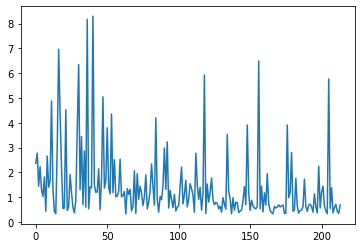

In [215]:
go_cues_diff = ((trials_df['stim time'] - trials_df['go cue']))
print(go_cues_diff)
print(min(go_cues_diff)) #0.49
print(max(go_cues_diff)) #1.19 
plt.plot(go_cues_diff)

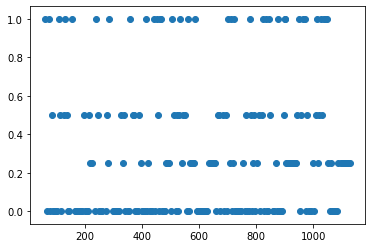

In [281]:
plt.scatter(trial_df.trials_intervals, trial_df.trials_vStim_cLeft)

In [218]:
# create new variable with true where all the contrast left is 0
is_0 =  trial_df['trials_vStim_cLeft'] ==0


# create new variable with true where all the contrast is 0 in both - NoGo trials
is_0_RL = (trial_df['trials_vStim_cLeft']==0) & (trial_df['trials_vStim_cRight']==0)
print(is_0_RL.head())

len(is_0_RL)

0    False
1    False
2    False
3     True
4    False
dtype: bool


214

In [219]:
# filter data by creating a new dataframe


In [220]:
# difference between consecutive rows - trials_intervals
# https://pythontic.com/pandas/dataframe-computations/difference

trials_intervals_diff = trial_df.trials_intervals.diff()

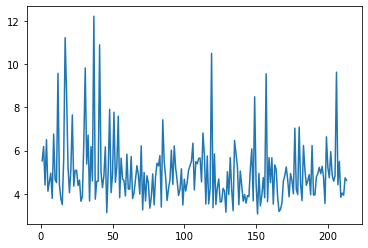

In [221]:
plt.plot(trials_intervals_diff)

In [256]:
# https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

# Create data frame only with the NoGo
trial2_df = trial_df.loc[(trial_df['trials_vStim_cLeft'] == 0) & (trial_df['trials_vStim_cRight']==0)]
trial2_df

,trials_resp_choice,trials_resp_times,trials_goCue_times,trials_vStim_cLeft,trials_vStim_cRight,trials_vStim_times,trials_intervals,trials_feedback_times,trials_feedbackType,trials_included,trials_repNum
3,0.0,83.502065,81.996875,0.0,0.0,81.235263,79.003653,83.531699,1.0,True,1.0
5,1.0,92.167720,91.837432,0.0,0.0,90.650613,89.617592,92.197438,-1.0,True,1.0
6,-1.0,97.117508,96.572307,0.0,0.0,95.984298,94.167702,97.126316,-1.0,True,2.0
7,-1.0,100.900586,100.157164,0.0,0.0,99.550755,99.117619,100.907576,-1.0,True,3.0
8,0.0,107.663576,106.157660,0.0,0.0,105.566451,102.902255,107.704085,1.0,True,4.0
11,0.0,126.403458,124.897959,0.0,0.0,123.716340,118.833840,126.433983,1.0,True,1.0
16,0.0,154.949572,153.444014,0.0,0.0,152.697202,145.730701,154.979639,1.0,True,1.0
18,-1.0,168.863679,168.598656,0.0,0.0,167.830244,165.596946,168.872260,-1.0,True,1.0
19,-1.0,172.913387,172.534318,0.0,0.0,171.412701,170.863626,172.915924,-1.0,True,2.0
20,0.0,178.034969,176.529182,0.0,0.0,175.479965,174.913822,178.065607,1.0,True,3.0


In [280]:
#plt.plot(trial_df.trials_feedbackType)
trial_df.trials_feedbackType

df4 = trial_df['trials_feedbackType']({'a': trial_df['trials_feedbackType'] == 1, 'b': trial_df['trials_feedbackType'] == -1})
plt.figure();
ax = df4.plot.area()


TypeError: 'Series' object is not callable

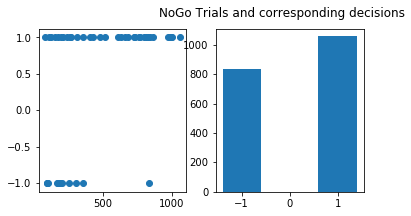

In [278]:
#https://matplotlib.org/3.3.0/tutorials/introductory/pyplot.html

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.scatter(trial2_df['trials_vStim_times'],trial2_df['trials_feedbackType'])

plt.subplot(132)
plt.bar(trial2_df['trials_feedbackType'], trial2_df['trials_vStim_times'],)

plt.suptitle('NoGo Trials and corresponding decisions')
plt.show()

#plt.scatter(trial2_df['trials_vStim_times'],trial2_df['trials_feedbackType'])

#plotting, within 0 contrast (NoGo trials), how many times they did false positives, i.e., turned the wheel 


NameError: name 'count' is not defined

In [30]:







##To adjust the size of one figure:

#import matplotlib.pyplot as plt

#fig=plt.figure(figsize=(15, 15))
#To change the default settings, and therefore all your plots:

#import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [15, 15]

Useful links: 

data: 
https://www.w3resource.com/pandas/dataframe/dataframe-plot-area.php
https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values
https://www.delftstack.com/howto/python-pandas/how-to-create-an-empty-column-in-pandas-dataframe/

loop issues: 
https://www.datacamp.com/community/tutorials/for-loops-in-python?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034349&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1011752&gclid=EAIaIQobChMIkfT0pKXj6gIVhIbVCh0ctg9-EAAYASAAEgKCSvD_BwE


plot: 
https://matplotlib.org/3.3.0/tutorials/introductory/pyplot.html
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


In [ ]:
## JUST TO CHECK THE WHAT THE DIFF VARS MEAN
# pars trials info =================================
# create spike_df tataframe, with each spike time and the cluster it belongs to
trial_df = pd.DataFrame( 
    { 'trials_resp_choice':session['trials_response_choice'][:,0], #-1 for Right choice (i.e. correct when stimuli are on the right); +1 for left choice; 0 for Nogo choice. Note that in a small percentage of cases (~4%, see manuscript Methods) the initial wheel turn was in the opposite direction. 
    'trials_resp_times': session['trials_response_times'][:,0], 
     
    'trials_goCue_times': session['trials_goCue_times'][:,0] ,#auditory cue
     
    'trials_vStim_cLeft': session['trials_visualStim_contrastLeft'][:,0], #A value of 0.5 means 50% contrast. 0 is a blank screen: no change to any pixel values on that side (completely undetectable).
    'trials_vStim_cRight': session['trials_visualStim_contrastRight'][:,0], 
    'trials_vStim_times': session['trials_visualStim_times'][:,0], 

    'trials_intervals': session['trials_intervals'][:,0], 
                                                
    'trials_feedback_times': session['trials_feedback_times'][:,0],
    'trials_feedbackType': session['trials_feedbackType'][:,0], # -1 negative - noise; 1 positive - water
    
    'trials_included': session['trials_included'][:,0], #Importantly, while this variable gives inclusion criteria according to the definition of disengagement (see manuscript Methods), it does not give inclusion criteria based on the time of response, as used for most analyses in the paper.
    'trials_repNum': session['trials_repNum'][:,0], #Trials are repeated if they are "easy" trials (high contrast stimuli with large difference between the two sides, or the blank screen condition) and this keeps track of how many times the current trial's condition has been repeated.
    },
                       )
#????? 
# add spikes to session dictionary
session['trial_df']=trial_df